In [1]:
# Author: Van Hoan Do <vanhoan310@gmail.com>
# License: BSD 3 clause (C) 2020
from numpy import genfromtxt
import numpy as np 
import matplotlib
import pylab as plt
import pandas as pd
from Jvis import UMAP, JUMAP, JTSNE
import time

In [2]:
## Run ML methods    
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import datasets
from sklearn import svm
import random
# X, y = datasets.load_iris(return_X_y=True)

In [3]:
def normalize_matrix(A, option = "Frobenius"):
    if option == "Frobenius":
        return (A/np.linalg.norm(A))
    elif option == "max":
        return (A/A.max())
    else:
        "Not implemented yet"

In [4]:
rna_matrix = np.genfromtxt('../data/cbmc_rna_pca.csv', delimiter=',')
adt_matrix = np.genfromtxt('../data/cbmc_adt.csv', delimiter=',')

In [5]:
y = np.genfromtxt('../data/cbmc_citefuse_labels.csv', delimiter=',')
cell_types = ["CD4+ T", "CD14+ Mono", "B", "NK", "CD34+", "pDCs", "CD8+ T", "CD16+ Mono.", "Eryth", "DC"] # citefuse
labels_true = y.astype(int)

In [11]:
metrics = 'correlation'; n_NN = 15;min_dist = 0.04
joint_umap_obj = JUMAP(init='random', metric=metrics, min_dist=min_dist)
data = {'rna': rna_matrix, 'adt': adt_matrix}
joint_umap = joint_umap_obj.fit(data, alpha=[0.5, 0.5])
JointEL_embedding = joint_umap_obj.embedding_

In [7]:
print("z-transform")
concat = np.concatenate((rna_matrix, adt_matrix), axis = 1)
X_train = concat
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
umap_ZScale = UMAP().fit_transform(X_scaled)

z-transform


In [8]:
concatRangeScale = np.concatenate((normalize_matrix(rna_matrix, "max"), normalize_matrix(adt_matrix, "max")), axis = 1)
umap_RangeScale= UMAP().fit_transform(concatRangeScale)

In [9]:
data_set = 'CBMC'

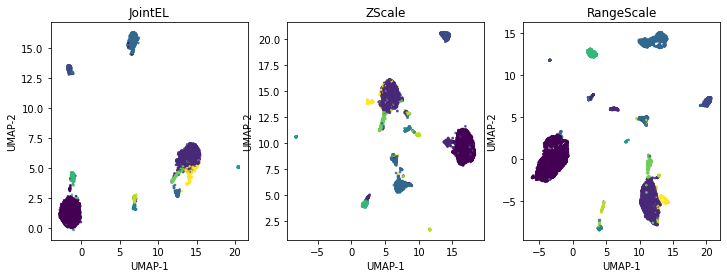

In [12]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(131)
ax.scatter(JointEL_embedding[:,0], JointEL_embedding[:,1], s=3, c = labels_true, alpha=0.8)
ax.set_xlabel('UMAP-1')
ax.set_ylabel('UMAP-2')
ax.set_title('JointEL')
ax = fig.add_subplot(132)
ax.scatter(umap_ZScale[:,0], umap_ZScale[:,1], s=3, c = labels_true, alpha=0.8)
ax.set_xlabel('UMAP-1')
ax.set_ylabel('UMAP-2')
ax.set_title('ZScale')
ax = fig.add_subplot(133)
ax.scatter(umap_RangeScale[:,0], umap_RangeScale[:,1], s=3, c = labels_true, alpha=0.8)
ax.set_xlabel('UMAP-1')
ax.set_ylabel('UMAP-2')
ax.set_title('RangeScale')
plt.savefig('../visualization/'+data_set+'_UMAP.pdf', bbox_inches='tight')
plt.show()